In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [3]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

In [4]:
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer

In [5]:
df = pd.read_csv('artists.csv')
df

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


In [6]:
df.columns


Index(['id', 'name', 'years', 'genre', 'nationality', 'bio', 'wikipedia',
       'paintings'],
      dtype='object')

In [9]:
import numpy as np
import os
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import random

# Define the folder path containing the images
folder_path = '/Users/utkle/Desktop/Flatiron.nosync/PROJECTS/CAPSTONE/resized/resized'

# Create empty NumPy arrays for the images and labels
images = []
labels = []

# Image preprocessing parameters
IMAGE_SIZE = (300, 300)
NUM_CLASSES = 51

# Define the number of images to sample
num_images = 1000

# Get a list of all the image filenames
filenames = os.listdir(folder_path)

# Sample num_images filenames randomly
sampled_filenames = random.sample(filenames, num_images)

# Iterate over the sampled image filenames
for filename in sampled_filenames:
    # Load the image as a Pillow Image object
    image = Image.open(os.path.join(folder_path, filename))
    
    # Convert the image to RGB format
    image = image.convert('RGB')
    
    # Resize the image
    image = image.resize(IMAGE_SIZE)
    
    # Convert the image to a NumPy array
    image_array = np.array(image)
    
    # Append the image array to the images list
    images.append(image_array)
    
    # Extract the label from the filename and append it to the labels list
    label = filename.split('_')[:-1] # drop the last part of the filename
    label = ''.join(label) 
    labels.append(label)

# Convert the images and labels lists to NumPy arrays
X = np.array(images)
y = np.array(labels)

# Encode the target labels using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Convert the target labels to categorical
y = to_categorical(y, NUM_CLASSES)


In [10]:
X = X.astype('float32') / 300

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (800, 300, 300, 3) (800, 51)
Testing set shape: (200, 300, 300, 3) (200, 51)


In [13]:


# Define the model architecture
model = Sequential([
    # Convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    # Max pooling layer with 2x2 pool size
    MaxPooling2D((2, 2)),
    # Convolutional layer with 64 filters, a 3x3 kernel, and ReLU activation
    Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer with 2x2 pool size
    MaxPooling2D((2, 2)),
    # Convolutional layer with 128 filters, a 3x3 kernel, and ReLU activation
    Conv2D(128, (3, 3), activation='relu'),
    # Max pooling layer with 2x2 pool size
    MaxPooling2D((2, 2)),
    # Flatten layer to convert the 2D feature maps to a 1D feature vector
    Flatten(),
    # Fully connected layer with 512 units and ReLU activation
    Dense(512, activation='relu'),
    # Output layer with 51 units and softmax activation
    Dense(51, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


2023-04-07 19:59:55.377416: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 19:59:55.432586: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7febf150c3e0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-04-07 19:59:55.432604: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 156800)            0

In [15]:
history_cnn = model.fit(X_train, y_train, epochs= 10, batch_size=32, verbose = 2, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/10
25/25 - 49s - loss: 4.6098 - accuracy: 0.0562 - val_loss: 3.6284 - val_accuracy: 0.1000
Epoch 2/10
25/25 - 50s - loss: 3.5345 - accuracy: 0.1200 - val_loss: 3.5815 - val_accuracy: 0.0750
Epoch 3/10
25/25 - 51s - loss: 3.2762 - accuracy: 0.1700 - val_loss: 3.3298 - val_accuracy: 0.1350
Epoch 4/10
25/25 - 56s - loss: 2.7378 - accuracy: 0.2850 - val_loss: 3.2486 - val_accuracy: 0.1750
Epoch 5/10
25/25 - 64s - loss: 1.7602 - accuracy: 0.5362 - val_loss: 3.4665 - val_accuracy: 0.2050
Epoch 6/10
25/25 - 58s - loss: 0.7967 - accuracy: 0.7937 - val_loss: 4.7915 - val_accuracy: 0.2050
Epoch 7/10
25/25 - 58s - loss: 0.3710 - accuracy: 0.9125 - val_loss: 5.9271 - val_accuracy: 0.1450
Epoch 8/10
25/25 - 60s - loss: 0.1857 - accuracy: 0.9575 - val_loss: 7.4487 - val_accuracy: 0.1900
Epoch 9/10
25/25 - 56s - loss: 0.2044 - accuracy: 0.9450 - val_loss: 6.3651 - val_accuracy: 0.1850
Epoch 10/10
25/25 - 55s - loss: 0.1570 - accuracy: 0.9725 - val_loss: 6.5055 - val_accuracy: 0.1400
7/7 [====

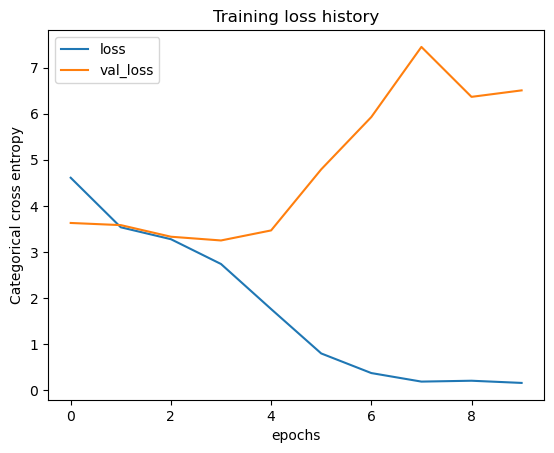

In [19]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

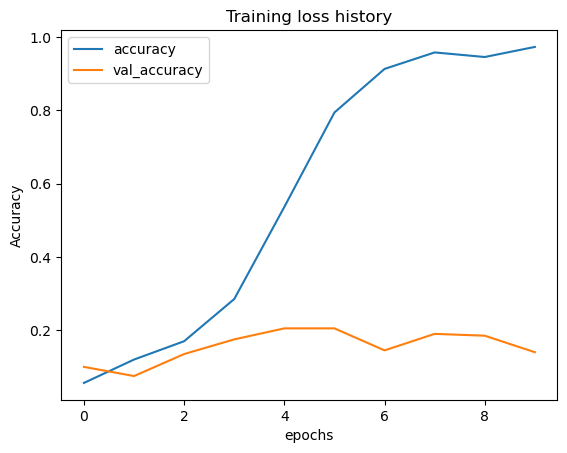

In [20]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [21]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# a new layer that rescales/normalizes the activations after each layer.
# has a weak regularization effect. also allows 

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

In [22]:
model2 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
model2.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(300, 300, 3), kernel_regularizer = l2(5e-4) ))

model2.add(BatchNormalization())
# max pool in 2x2 window
model2.add(MaxPooling2D(pool_size=(2, 2)))
# define 3x3 filter window sizes. Create 64 filters.
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4) ))

model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))

model2.add(BatchNormalization())

# transition to dense fully-connected part of network
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))

model2.add(BatchNormalization())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))

model2.add(BatchNormalization())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(51, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [25]:
history_reg = model2.fit(X_train, y_train, epochs= 10, batch_size=32, verbose = 2, validation_data=(X_test, y_test))


Epoch 1/10
25/25 - 61s - loss: 3.2494 - accuracy: 0.2163 - val_loss: 4.1707 - val_accuracy: 0.0300
Epoch 2/10
25/25 - 65s - loss: 2.9944 - accuracy: 0.2562 - val_loss: 4.0292 - val_accuracy: 0.0800
Epoch 3/10
25/25 - 62s - loss: 2.7192 - accuracy: 0.3100 - val_loss: 4.4209 - val_accuracy: 0.0250
Epoch 4/10
25/25 - 61s - loss: 2.4680 - accuracy: 0.3625 - val_loss: 4.5427 - val_accuracy: 0.0250
Epoch 5/10
25/25 - 72s - loss: 2.1747 - accuracy: 0.4588 - val_loss: 4.3333 - val_accuracy: 0.0200
Epoch 6/10
25/25 - 73s - loss: 1.8528 - accuracy: 0.5175 - val_loss: 4.3605 - val_accuracy: 0.0300
Epoch 7/10
25/25 - 69s - loss: 1.5989 - accuracy: 0.6125 - val_loss: 5.0250 - val_accuracy: 0.0250
Epoch 8/10
25/25 - 62s - loss: 1.3348 - accuracy: 0.6687 - val_loss: 4.2272 - val_accuracy: 0.1250
Epoch 9/10
25/25 - 70s - loss: 1.1181 - accuracy: 0.7400 - val_loss: 4.3900 - val_accuracy: 0.0250
Epoch 10/10
25/25 - 85s - loss: 0.9210 - accuracy: 0.7987 - val_loss: 5.5066 - val_accuracy: 0.0250


In [28]:
test2_acc = model2.evaluate(X_test, y_test)

7/7 [==============================] - 3s 450ms/step - loss: 5.5066 - accuracy: 0.0250


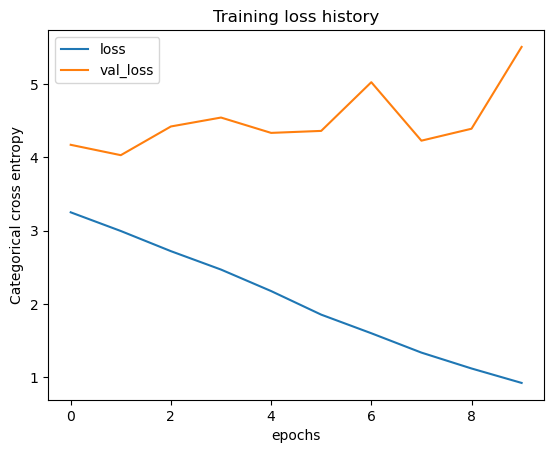

In [29]:
train_regcnn_history = pd.DataFrame(history_reg.history)
train_regcnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_regcnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

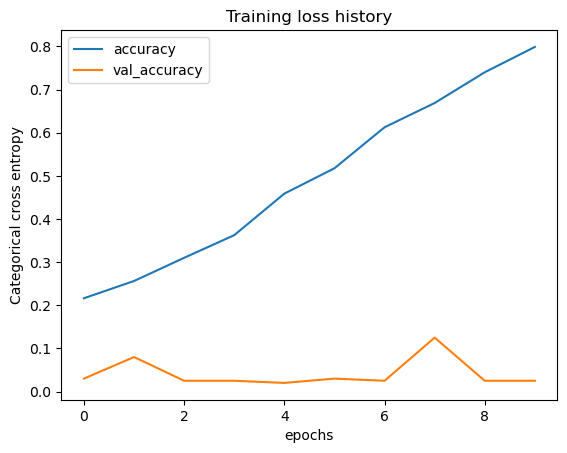

In [30]:
train_regcnn_history = pd.DataFrame(history_reg.history)
train_regcnn_history.index.name = 'epochs'

col_list = ['accuracy', 'val_accuracy']
train_regcnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

In [16]:
# artists = df.sort_values(by=['paintings'], ascending=False)
# # Create a dataframe with artists having more than 200 paintings
# artists_top = artists[artists['paintings'] >= 200].reset_index()
# artists_top = artists_top[['name', 'paintings']]
# #artists_top['class_weight'] = max(artists_top.paintings)/artists_top.paintings
# artists_top['class_weight'] = artists_top.paintings.sum() / (artists_top.shape[0] * artists_top.paintings)
# artists_top

In [17]:
# # Explore images of top artists
# images_dir = '/Users/utkle/Desktop/Flatiron.nosync/PROJECTS/CAPSTONE/images/images'
# artists_dirs = os.listdir(images_dir)
# artists_top_name = artists_top['name'].str.replace(' ', '_').values

# # See if all directories exist
# for name in artists_top_name:
#     if os.path.exists(os.path.join(images_dir, name)):
#         print("Found -->", os.path.join(images_dir, name))
#     else:
#         print("Did not find -->", os.path.join(images_dir, name))

In [18]:
# n = 5  # taking 5 random pic
# fig, axes = plt.subplots(1, n, figsize=(20,10))

# for i in range(n):
#     random_artist = random.choice(artists_top_name)
#     random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
#     random_image_file = os.path.join(images_dir, random_artist, random_image)
#     image = plt.imread(random_image_file)
#     axes[i].imshow(image)
#     axes[i].set_title("Artist: " + random_artist.replace('_', ' '))
#     axes[i].axis('off')

# plt.show()